In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge




In [3]:
df = pd.read_csv('/content/car_prices_dataset - car_prices_dataset.csv')

In [4]:
df.head()

,Make,Model,Year,Mileage,Engine Size (L),Fuel Type,Transmission,Horsepower,Number of Doors,Price ($)
0,Chevrolet,Cruze,2005,41531,3.3,Diesel,Automatic,272,2,5502.62
1,Honda,Accord,2019,129606,1.1,Diesel,Manual,208,4,11718.97
2,Honda,CR-V,2018,95481,3.7,Diesel,Automatic,425,2,16061.98
3,Audi,A6,2021,122983,2.0,Electric,Automatic,261,2,27599.81
4,Mercedes,GLA,2019,105776,2.5,Electric,Automatic,113,4,37560.61


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             100 non-null    object 
 1   Model            100 non-null    object 
 2   Year             100 non-null    int64  
 3   Mileage          100 non-null    int64  
 4   Engine Size (L)  100 non-null    float64
 5   Fuel Type        100 non-null    object 
 6   Transmission     100 non-null    object 
 7   Horsepower       100 non-null    int64  
 8   Number of Doors  100 non-null    int64  
 9   Price ($)        100 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 7.9+ KB


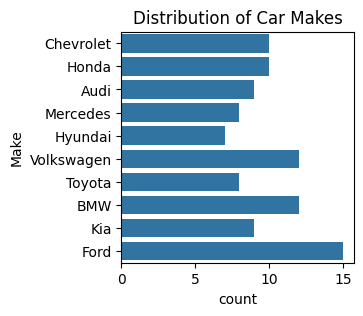

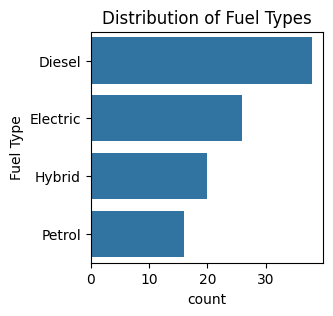

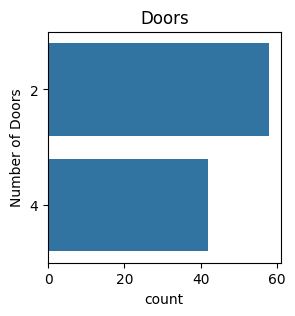

In [7]:
plt.figure(figsize=(3, 3))
sns.countplot(y='Make', data=df)
plt.title('Distribution of Car Makes');
plt.figure(figsize=(3, 3))
sns.countplot(y='Fuel Type', data=df)
plt.title('Distribution of Fuel Types');
plt.figure(figsize=(3, 3))
sns.countplot(y='Number of Doors', data=df)
plt.title('Doors');

In [9]:
print(df.isnull().sum())

Make               0
Model              0
Year               0
Mileage            0
Engine Size (L)    0
Fuel Type          0
Transmission       0
Horsepower         0
Number of Doors    0
Price ($)          0
dtype: int64


In [12]:
df_encoded = pd.get_dummies(df, columns=['Make', 'Model', 'Fuel Type', 'Transmission'])
df_encoded.head()



,Year,Mileage,Engine Size (L),Horsepower,Number of Doors,Price ($),Make_Audi,Make_BMW,Make_Chevrolet,Make_Ford,...,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_Petrol,Transmission_Automatic,Transmission_Manual
0,2005,41531,3.3,272,2,5502.62,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1,2019,129606,1.1,208,4,11718.97,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2018,95481,3.7,425,2,16061.98,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,2021,122983,2.0,261,2,27599.81,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,2019,105776,2.5,113,4,37560.61,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [15]:
scaler = StandardScaler()

features_to_scale = ['Year', 'Mileage', 'Engine Size (L)', 'Horsepower', 'Number of Doors']
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

In [16]:
df_encoded.head()

,Year,Mileage,Engine Size (L),Horsepower,Number of Doors,Price ($),Make_Audi,Make_BMW,Make_Chevrolet,Make_Ford,...,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_Petrol,Transmission_Automatic,Transmission_Manual
0,-1.701419,-1.008257,0.257912,0.194428,-0.850963,5502.62,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1,0.784997,0.472391,-1.747056,-0.386767,1.175139,11718.97,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.607396,-0.101292,0.622451,1.583846,-0.850963,16061.98,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,1.140199,0.361050,-0.926842,0.094535,-0.850963,27599.81,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,0.784997,0.071780,-0.471167,-1.249477,1.175139,37560.61,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [17]:
print(df_encoded.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    100 non-null    float64
 1   Mileage                 100 non-null    float64
 2   Engine Size (L)         100 non-null    float64
 3   Horsepower              100 non-null    float64
 4   Number of Doors         100 non-null    float64
 5   Price ($)               100 non-null    float64
 6   Make_Audi               100 non-null    bool   
 7   Make_BMW                100 non-null    bool   
 8   Make_Chevrolet          100 non-null    bool   
 9   Make_Ford               100 non-null    bool   
 10  Make_Honda              100 non-null    bool   
 11  Make_Hyundai            100 non-null    bool   
 12  Make_Kia                100 non-null    bool   
 13  Make_Mercedes           100 non-null    bool   
 14  Make_Toyota             100 non-null    boo

In [20]:
corr_matrix = df_encoded.corr()
price_corr = corr_matrix['Price ($)'].sort_values(ascending=False)
price_corr

,Price ($)
Price ($),1.000000
Make_Mercedes,0.564854
Year,0.476311
Model_GLA,0.408218
Make_BMW,0.403012
Model_C-Class,0.294600
Model_5 Series,0.246038
Model_E-Class,0.231076
Make_Audi,0.228676
Model_X5,0.212751


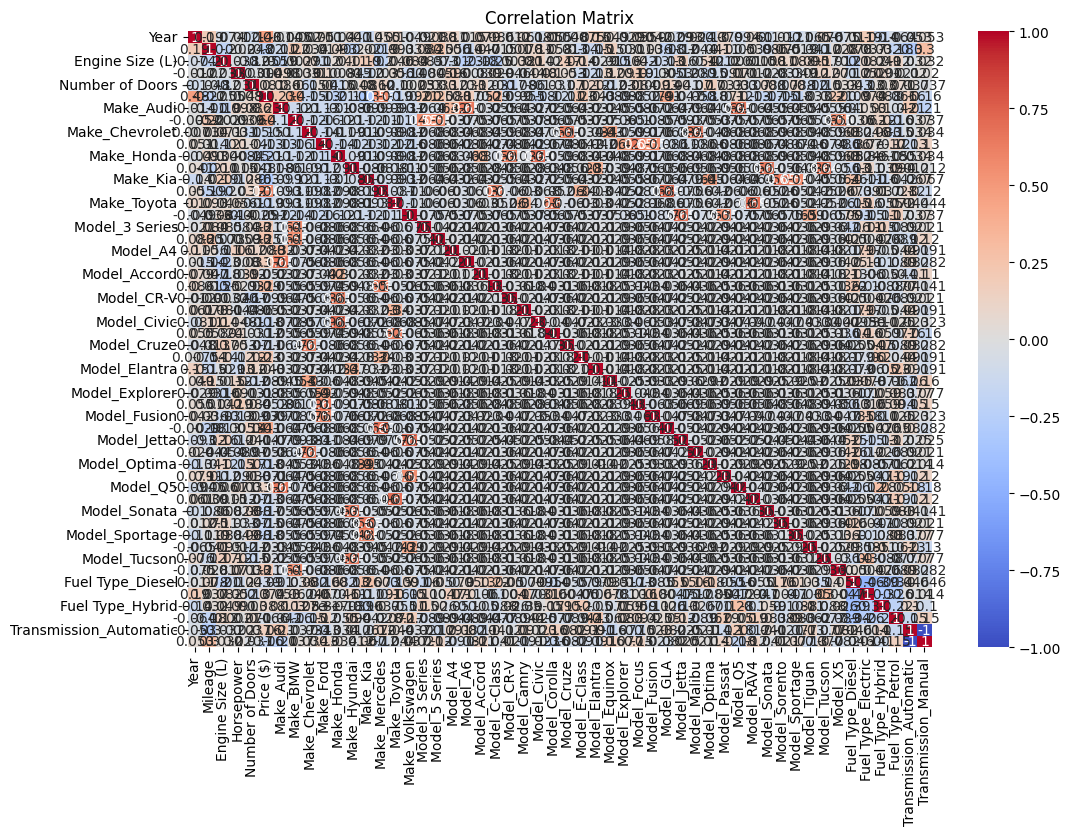

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
X = df_encoded.drop('Price ($)', axis=1)
y = df_encoded['Price ($)']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_test_pred = model.predict(X_test)

In [37]:
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Testing MSE: ",mse_test, "\tAcuracy :", r2_test)

Testing MSE:  2892635.2392396866 	Acuracy : 0.9746480831656033


In [38]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})

print(coefficients)

                   Feature   Coefficient
0                     Year  4.546618e+03
1                  Mileage -2.018264e+03
2          Engine Size (L)  1.722668e+03
3               Horsepower -3.105634e+01
4          Number of Doors -3.378522e+01
5                Make_Audi  4.979321e+15
6                 Make_BMW  1.810301e+15
7           Make_Chevrolet  8.954536e+14
8                Make_Ford  8.153336e+14
9               Make_Honda  2.997283e+15
10            Make_Hyundai  4.259218e+15
11                Make_Kia  4.788382e+15
12           Make_Mercedes  3.459384e+14
13             Make_Toyota  3.976486e+15
14         Make_Volkswagen  3.515743e+14
15          Model_3 Series  3.446139e+14
16          Model_5 Series  3.446139e+14
17                Model_A4 -2.824406e+15
18                Model_A6 -2.824406e+15
19            Model_Accord -8.423675e+14
20           Model_C-Class  1.808977e+15
21              Model_CR-V -8.423675e+14
22             Model_Camry -1.821571e+15
23             M

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

In [48]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [51]:
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)

y_test_pred_poly = model_poly.predict(X_test_poly)
mse_test_poly = mean_squared_error(y_test_poly, y_test_pred_poly)
r2_test_poly = r2_score(y_test_poly, y_test_pred_poly)

print("Polynomial Testing MSE: ",mse_test_poly)
print("Polynomial Testing Accuracy: ",r2_test_poly)

Polynomial Testing MSE:  70533436.4931632
Polynomial Testing Accuracy:  0.3818239535487069


<ipython-input-57-cf3d2df54186>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Absolute_Coefficient', y='Feature', data=coeff_df.head(10), palette='viridis')


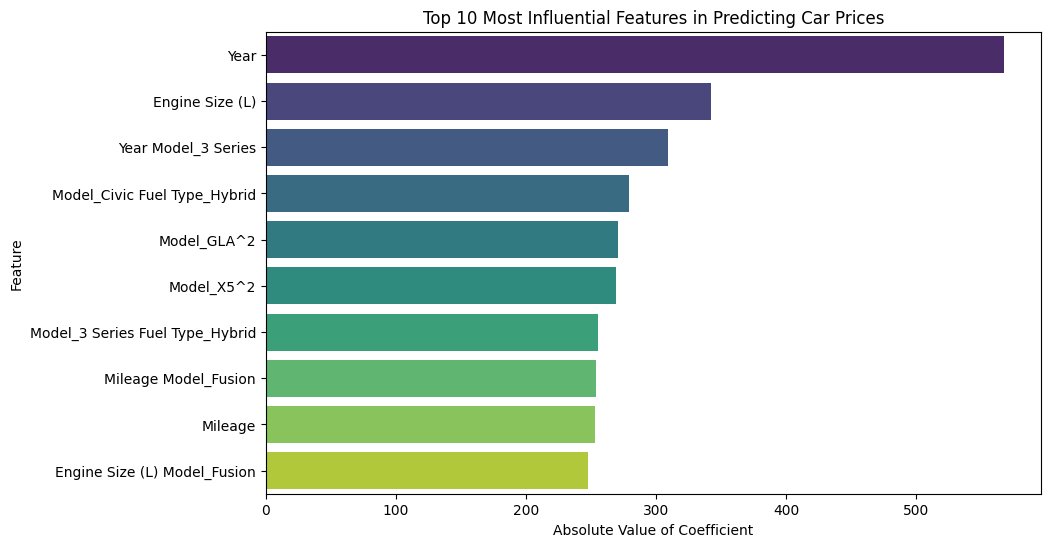

In [57]:
coefficients = model.coef_

poly_features = poly.get_feature_names_out(X.columns)

coeff_df = pd.DataFrame({
    'Feature': poly_features,
    'Coefficient': coefficients
})

coeff_df['Absolute_Coefficient'] = np.abs(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='Absolute_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute_Coefficient', y='Feature', data=coeff_df.head(10), palette='viridis')
plt.title('Top 10 Most Influential Features in Predicting Car Prices')
plt.xlabel('Absolute Value of Coefficient')
plt.ylabel('Feature')
plt.show()